In [192]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import pylab
import scipy
from scipy import stats
import statsmodels.api as sm

import plotly.io as pio
pio.renderers.default = "svg"
svg_renderer = pio.renderers["svg"]
svg_renderer.scale = 1.2

In [193]:
df = pd.read_csv('/Users/lizazukova/Desktop/Customer_retention.csv', sep = ';')

In [194]:
df['MonthlyCharges'] = pd.to_numeric(df['MonthlyCharges'], errors='coerce')
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['ltv'] = df['MonthlyCharges'] * df['tenure']
df[:1]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,ltv
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,29.85


(array([436., 169.,  36., 167.,   5.,  29.,  12.,  25.,  74.,   8.,  62.,
         32.,  57., 194.,  19., 190., 107.,  96., 204.,  43., 148.,  85.,
         67., 125.,  48., 278., 116., 166., 265.,  66., 308., 156., 150.,
        259.,  82., 270., 130., 165., 213.,  93., 236., 114., 149., 177.,
         82., 115.,  58.,  50.,  54.,  17.]),
 array([ 18.25,  20.26,  22.27,  24.28,  26.29,  28.3 ,  30.31,  32.32,
         34.33,  36.34,  38.35,  40.36,  42.37,  44.38,  46.39,  48.4 ,
         50.41,  52.42,  54.43,  56.44,  58.45,  60.46,  62.47,  64.48,
         66.49,  68.5 ,  70.51,  72.52,  74.53,  76.54,  78.55,  80.56,
         82.57,  84.58,  86.59,  88.6 ,  90.61,  92.62,  94.63,  96.64,
         98.65, 100.66, 102.67, 104.68, 106.69, 108.7 , 110.71, 112.72,
        114.73, 116.74, 118.75]),
 <BarContainer object of 50 artists>)

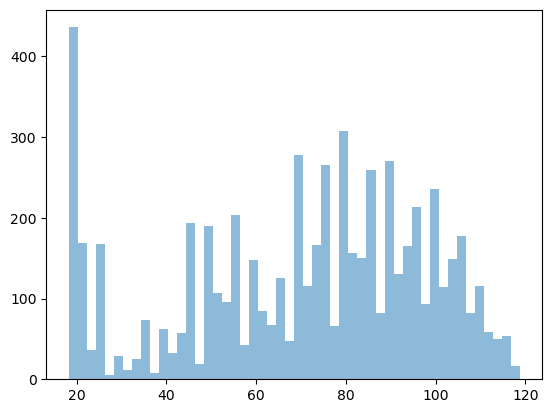

In [195]:
plt.hist(df['MonthlyCharges'], bins = 50, alpha = 0.5)

(array([1046.,  525.,  407.,  321.,  303.,  284.,  262.,  274.,  223.,
         185.,  182.,  136.,  119.,  124.,  110.,  105.,   96.,  112.,
          96.,   99.,   95.,   78.,   97.,   99.,   85.,   80.,   86.,
          88.,  102.,   56.,   70.,   76.,   92.,   72.,   85.,   63.,
          73.,   62.,   55.,   57.,   56.,   45.,   44.,   43.,   35.,
          42.,   29.,   26.,   17.,    8.]),
 array([  18.85 ,  192.169,  365.488,  538.807,  712.126,  885.445,
        1058.764, 1232.083, 1405.402, 1578.721, 1752.04 , 1925.359,
        2098.678, 2271.997, 2445.316, 2618.635, 2791.954, 2965.273,
        3138.592, 3311.911, 3485.23 , 3658.549, 3831.868, 4005.187,
        4178.506, 4351.825, 4525.144, 4698.463, 4871.782, 5045.101,
        5218.42 , 5391.739, 5565.058, 5738.377, 5911.696, 6085.015,
        6258.334, 6431.653, 6604.972, 6778.291, 6951.61 , 7124.929,
        7298.248, 7471.567, 7644.886, 7818.205, 7991.524, 8164.843,
        8338.162, 8511.481, 8684.8  ]),
 <BarContainer o

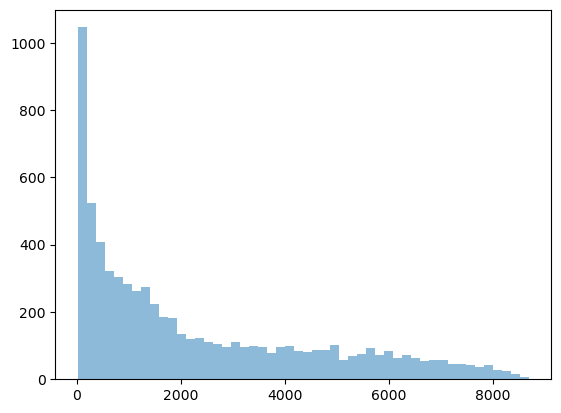

In [196]:
plt.hist(df['TotalCharges'], bins = 50, alpha = 0.5)

(array([624., 238., 376., 133., 241., 123., 235.,  99., 117., 185.,  99.,
        167.,  97., 144.,  63., 175.,  94.,  79., 151.,  57., 144.,  65.,
        133.,  65.,  88., 115.,  59., 120.,  70., 130.,  51., 135.,  68.,
         64., 134.,  68., 150.,  68., 144.,  65., 127.,  76.,  76., 142.,
         80., 165.,  98., 195., 119., 532.]),
 array([ 0.  ,  1.44,  2.88,  4.32,  5.76,  7.2 ,  8.64, 10.08, 11.52,
        12.96, 14.4 , 15.84, 17.28, 18.72, 20.16, 21.6 , 23.04, 24.48,
        25.92, 27.36, 28.8 , 30.24, 31.68, 33.12, 34.56, 36.  , 37.44,
        38.88, 40.32, 41.76, 43.2 , 44.64, 46.08, 47.52, 48.96, 50.4 ,
        51.84, 53.28, 54.72, 56.16, 57.6 , 59.04, 60.48, 61.92, 63.36,
        64.8 , 66.24, 67.68, 69.12, 70.56, 72.  ]),
 <BarContainer object of 50 artists>)

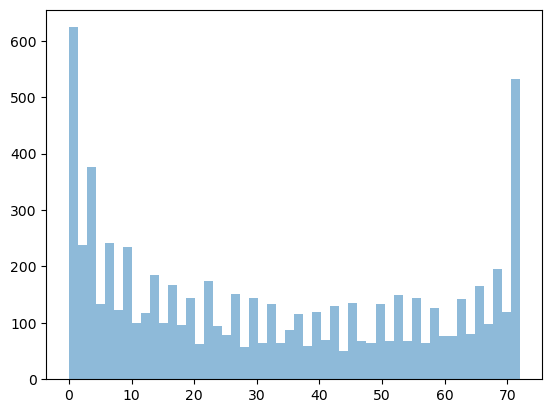

In [197]:
plt.hist(df['tenure'], bins = 50, alpha = 0.5)

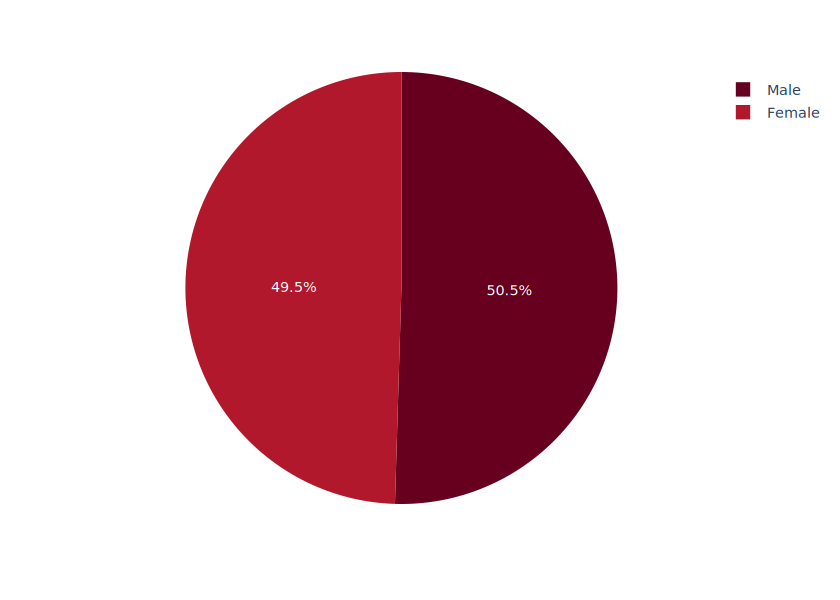

In [198]:
df['one'] = 1
df_sex_group = df[['gender', 'one']].groupby('gender').sum().reset_index()
df_sex_group

import plotly.express as px
fig = px.pie(df, values='one', names='gender', color_discrete_sequence=px.colors.sequential.RdBu)
fig.show()

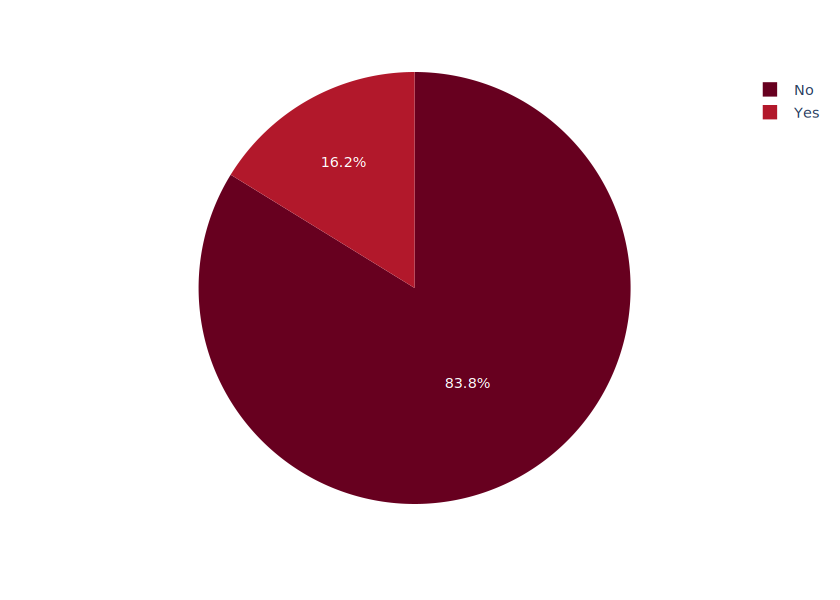

In [199]:
df['one'] = 1
df['SeniorCitizen'] = df['SeniorCitizen'].replace({1: 'Yes', 0: 'No'})
df_sex_group = df[['SeniorCitizen', 'one']].groupby('SeniorCitizen').sum().reset_index()
df_sex_group

fig = px.pie(df, values='one', names='SeniorCitizen', color_discrete_sequence=px.colors.sequential.RdBu)
fig.show()

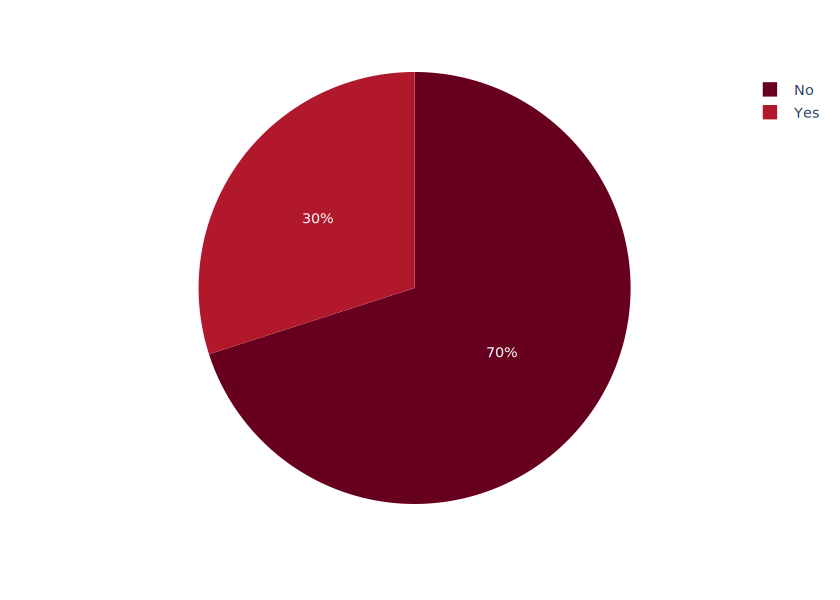

In [200]:
df_sex_group = df[['Dependents', 'one']].groupby('Dependents').sum().reset_index()
df_sex_group

fig = px.pie(df, values='one', names='Dependents', color_discrete_sequence=px.colors.sequential.RdBu)
fig.show()

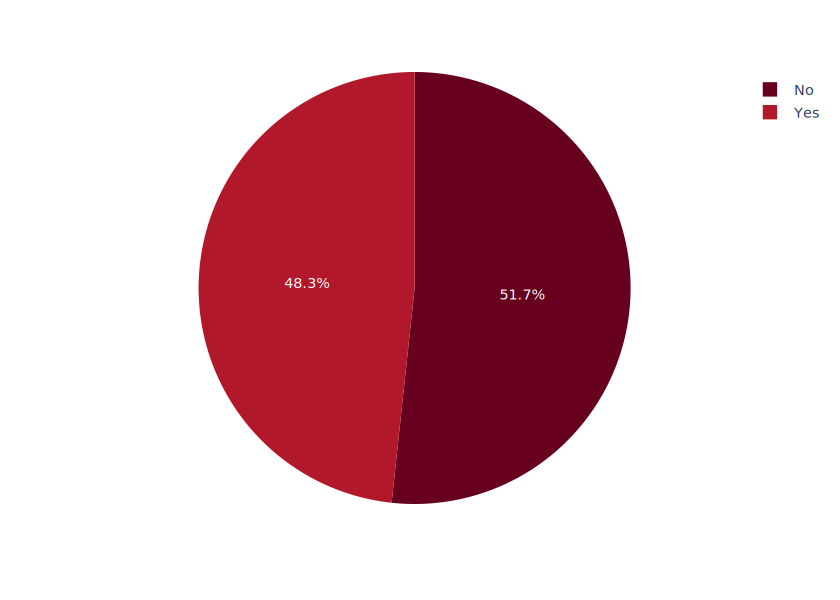

In [201]:
df_sex_group = df[['Partner', 'one']].groupby('Partner').sum().reset_index()
df_sex_group

fig = px.pie(df, values='one', names='Partner', color_discrete_sequence=px.colors.sequential.RdBu)
fig.show()

In [202]:
zscore = scipy.stats.zscore(df['tenure'])

In [203]:
zscore

0      -1.277445
1       0.066327
2      -1.236724
3       0.514251
4      -1.236724
          ...   
7038   -0.340876
7039    1.613701
7040   -0.870241
7041   -1.155283
7042    1.369379
Name: tenure, Length: 7043, dtype: float64

/Users/lizazukova/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning:

The figure layout has changed to tight



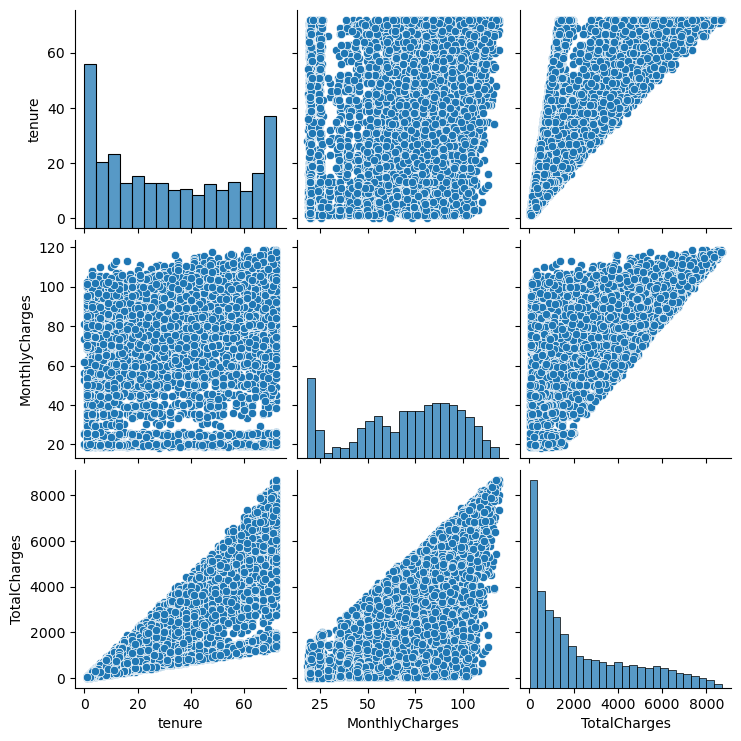

In [204]:
sns.pairplot(df[['tenure', 'MonthlyCharges', 'TotalCharges']])
plt.show()

In [205]:
stats.shapiro(df.tenure)

/Users/lizazukova/anaconda3/lib/python3.11/site-packages/scipy/stats/_morestats.py:1882: UserWarning:

p-value may not be accurate for N > 5000.



ShapiroResult(statistic=0.9037512540817261, pvalue=0.0)

In [206]:
Stat, p_value = stats.shapiro(df.tenure)

In [207]:
Stat

0.9037512540817261

# Гипотеза 1: LTV мужчин меньше, чем LTV женщин

In [208]:
df['ltv'].dtype

dtype('float64')

In [209]:
ct_o = df.groupby('gender')['ltv'].mean().reset_index()
ct_o

,gender,ltv
0,Female,2506.789922
1,Male,2497.410172


In [210]:
import scipy.stats

## Гипотеза: LTV мужчин меньше, чем LTV женщин

In [211]:
women = df[df['gender'] == 'Female']
men = df[df['gender'] == 'Male']

In [212]:
women.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3488 entries, 0 to 7040
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        3488 non-null   object 
 1   gender            3488 non-null   object 
 2   SeniorCitizen     3488 non-null   object 
 3   Partner           3488 non-null   object 
 4   Dependents        3488 non-null   object 
 5   tenure            3488 non-null   int64  
 6   PhoneService      3488 non-null   object 
 7   MultipleLines     3488 non-null   object 
 8   InternetService   3488 non-null   object 
 9   OnlineSecurity    3488 non-null   object 
 10  OnlineBackup      3488 non-null   object 
 11  DeviceProtection  3488 non-null   object 
 12  TechSupport       3488 non-null   object 
 13  StreamingTV       3488 non-null   object 
 14  StreamingMovies   3488 non-null   object 
 15  Contract          3488 non-null   object 
 16  PaperlessBilling  3488 non-null   object 
 17  

In [213]:
women.ltv.mean()

2506.7899217221134

In [214]:
men.ltv.mean()

2497.410171919771

In [215]:
women_ltv = women['ltv']
men_ltv = men['ltv']

<Axes: >

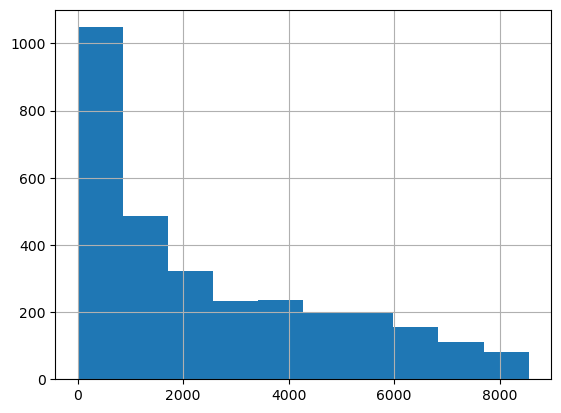

In [216]:
women_ltv.hist()

<Axes: >

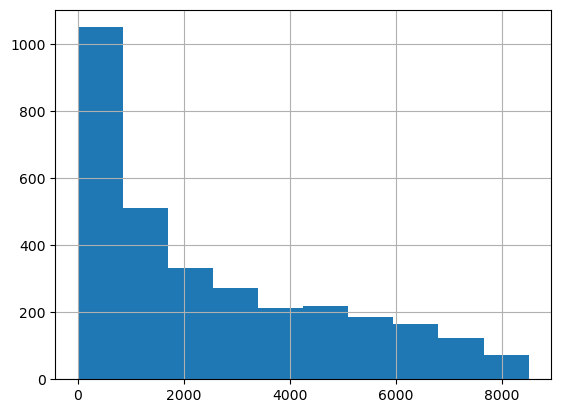

In [217]:
men_ltv.hist()

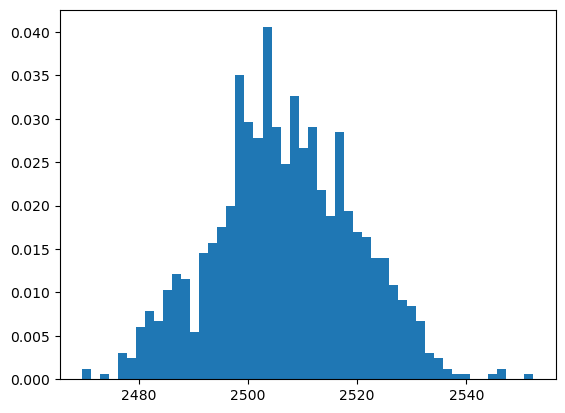

In [218]:
results_w = []
for i in range(1000):
    results_w.append(women.sample(frac = 10,\
                                    replace = True).ltv.mean())
plt.hist(results_w, density = True, bins = 50)
plt.show()

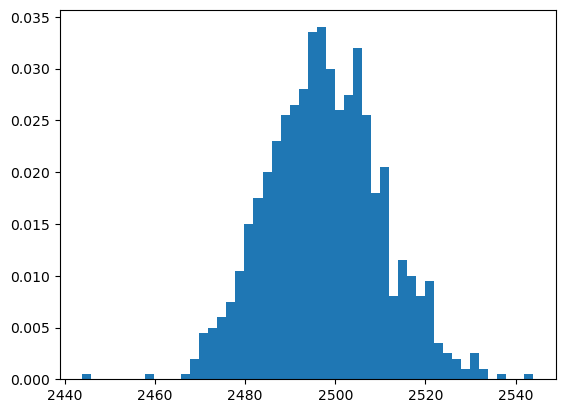

In [219]:
results_m = []
for i in range(1000):
    results_m.append(men.sample(frac = 10,\
                                    replace = True).ltv.mean())
plt.hist(results_m, density = True, bins = 50)
plt.show()

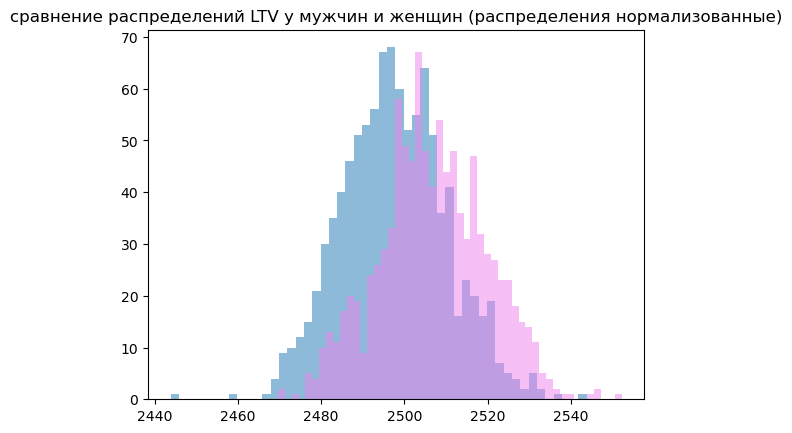

In [220]:
# сравнение распределений LTV у мужчин и женщин (распределения нормализованные)
plt.hist(results_m, label = "men", bins = 50, alpha = 0.5)
plt.hist(results_w, label = "women", bins = 50, alpha = 0.5, color='violet')
plt.title('сравнение распределений LTV у мужчин и женщин (распределения нормализованные)')
plt.show()

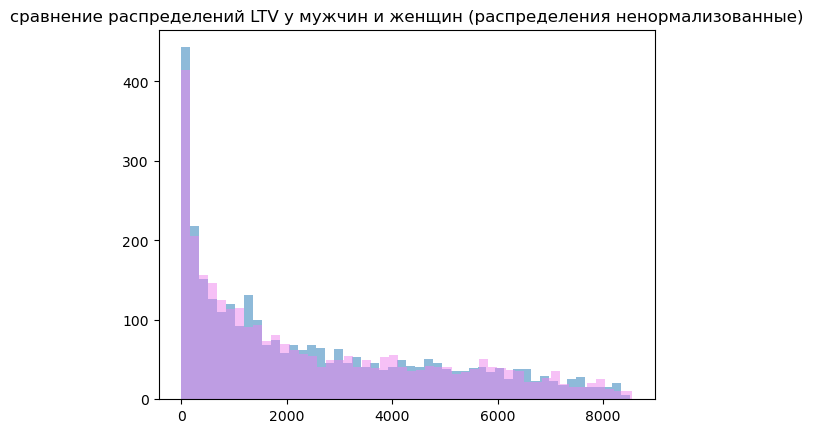

In [221]:
# сравнение распределений LTV у мужчин и женщин (распределения ненормализованные)
plt.hist(men_ltv, label = "men", bins = 50, alpha = 0.5)
plt.hist(women_ltv, label = "women", bins = 50, alpha = 0.5, color='violet')
plt.title('сравнение распределений LTV у мужчин и женщин (распределения ненормализованные)')
plt.show()

In [222]:
stats.shapiro(results_w)

ShapiroResult(statistic=0.9973389506340027, pvalue=0.09987851977348328)

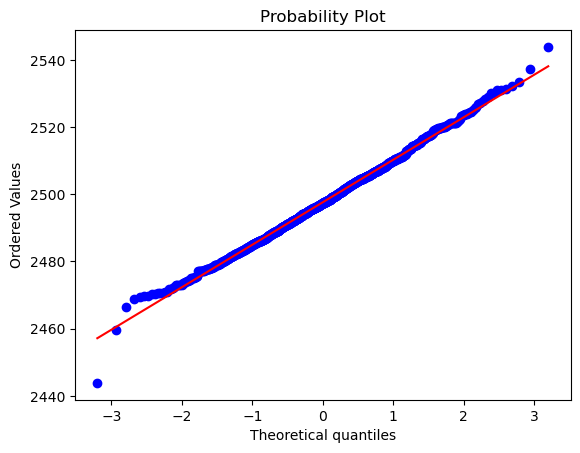

In [223]:
stats.probplot(results_m, dist = 'norm', plot = pylab)
plt.show()

In [224]:
stats.shapiro(results_m)

ShapiroResult(statistic=0.9972718358039856, pvalue=0.08948925137519836)

In [225]:
stats.fligner(men.ltv, women.ltv)

FlignerResult(statistic=nan, pvalue=nan)

In [226]:
var1 = women.ltv.var()
var1

5394687.03782171

In [227]:
var2 = men.ltv.var()
var2

5334313.768233291

In [228]:
dof = len(women) + len(men) - 2

In [229]:
dof

7041

In [230]:
n1 = len(women)
n2 = len(men)

In [231]:
n1 = len(women)
n2 = len(men)

v1 = var1/n1
v2 = var2/n2
dofW = (v1 +v2)**2/ (v1**2/(n1-1) +v2**2/ (n2-1))
dofW

7036.722212327031

In [232]:
dofW = (v1 +v2)**2/ (v1**2/(n1-1) +v2**2/ (n2-1))

In [233]:
dofW

7036.722212327031

In [234]:
ttest = scipy.stats.ttest_ind(results_m, results_w, equal_var = True)

In [235]:
ttest

TtestResult(statistic=-16.09394200714272, pvalue=6.823652829675634e-55, df=1998.0)

In [236]:
tstat = ttest[0]

In [237]:
tstat

-16.09394200714272

In [238]:
t_crit = stats.t.ppf(0.95, dofW)

In [239]:
t_crit

1.6450702009398708

In [240]:
def hypothesis_check (tstat, t_crit): 
    if abs(tstat) > t_crit:
        print ('Отвергаем Н0')
    else:
        print('He отвергаем НО')
        
hypothesis_check(tstat, t_crit)

Отвергаем Н0


In [241]:
hypothesis_check(tstat, t_crit)

Отвергаем Н0


## Гипотеза 2: ежемесячный чек людей, у которых есть партнер, выше, чем у тех, у кого нет партнера

In [242]:
yes_partner = df[df['Partner'] == 'Yes']
no_partner = df[df['Partner'] == 'No']

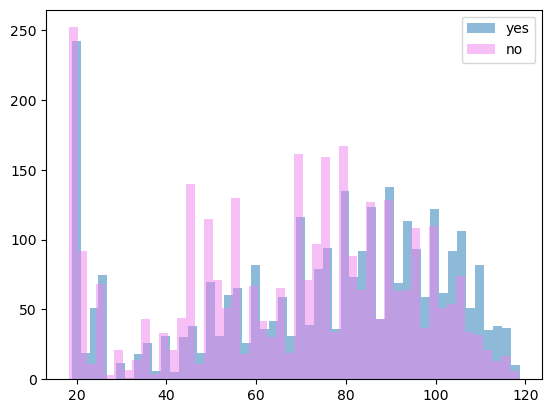

In [243]:
plt.hist(yes_partner['MonthlyCharges'], label = "yes", bins = 50, alpha = 0.5)
plt.hist(no_partner['MonthlyCharges'], label = "no", bins = 50, alpha = 0.5, color='violet')
plt.legend()
plt.show()

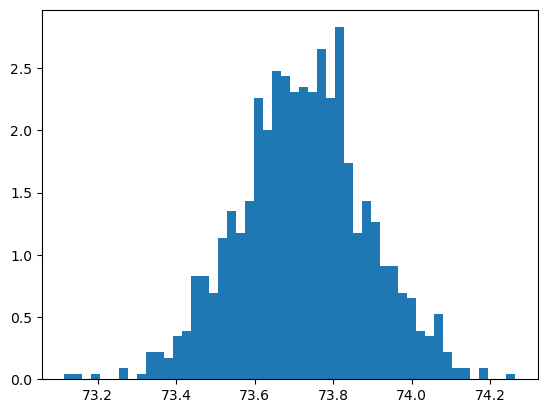

In [244]:
results_yes = []
for i in range(1000):
    results_yes.append(yes_partner.sample(frac = 10,\
                                    replace = True).MonthlyCharges.mean())
plt.hist(results_yes, density = True, bins = 50)
plt.show()

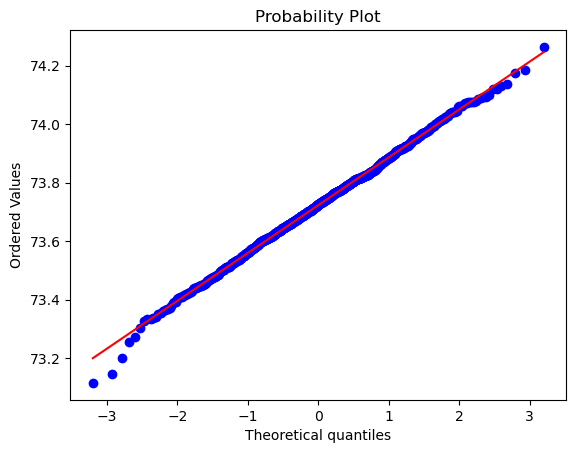

In [245]:
stats.probplot(results_yes, dist = 'norm', plot = pylab)
plt.show()

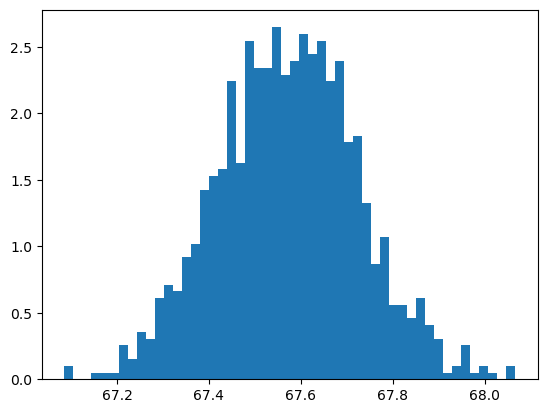

In [246]:
results_no = []
for i in range(1000):
    results_no.append(no_partner.sample(frac = 10,\
                                    replace = True).MonthlyCharges.mean())
plt.hist(results_no, density = True, bins = 50)
plt.show()

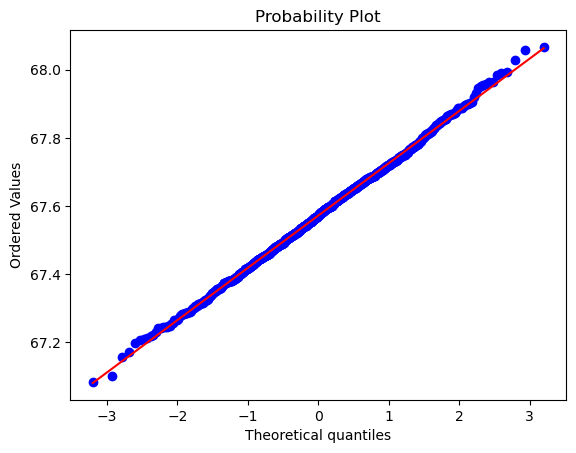

In [247]:
stats.probplot(results_no, dist = 'norm', plot = pylab)
plt.show()

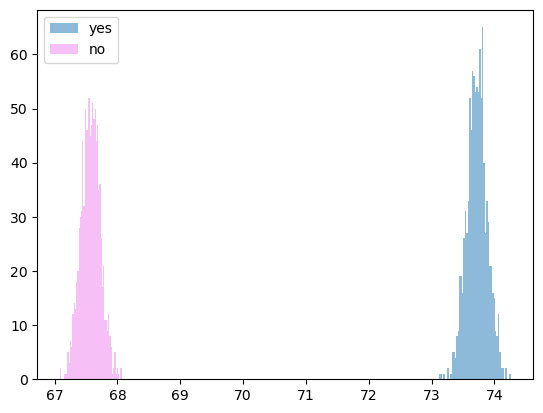

In [248]:
plt.hist(results_yes, label = "yes", bins = 50, alpha = 0.5)
plt.hist(results_no, label = "no", bins = 50, alpha = 0.5, color='violet')
plt.legend()
plt.show()

In [249]:
stats.fligner(yes_partner.MonthlyCharges, no_partner.MonthlyCharges)

FlignerResult(statistic=nan, pvalue=nan)

In [250]:
dof = len(yes_partner) + len(no_partner) - 2
dof

7041

In [251]:
ttest = scipy.stats.ttest_ind(results_m, results_w, equal_var = True)
ttest

TtestResult(statistic=-16.09394200714272, pvalue=6.823652829675634e-55, df=1998.0)

In [252]:
t_crit = stats.t.ppf(0.95, dofW)
t_crit

1.6450702009398708

In [253]:
def hypothesis_check (tstat, t_crit): 
    if abs(tstat) > t_crit:
        print ('Отвергаем Н0')
    else:
        print('He отвергаем НО')
        
hypothesis_check(tstat, t_crit)

Отвергаем Н0


## Гипотеза 3: среднемесячный расход людей с иждивенцами меньше, чем людей без иждивенцев

In [254]:
yes_partner = df[df['Dependents'] == 'Yes']
no_partner = df[df['Dependents'] == 'No']

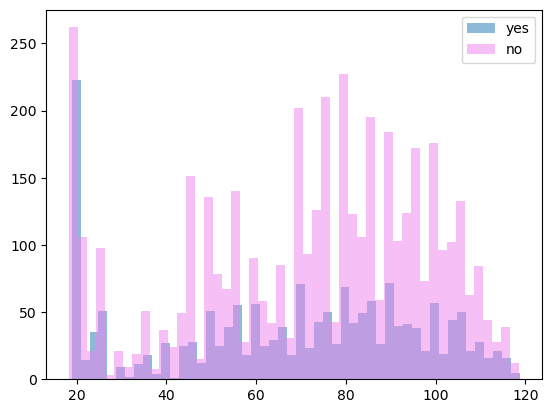

In [255]:
plt.hist(yes_partner['MonthlyCharges'], label = "yes", bins = 50, alpha = 0.5)
plt.hist(no_partner['MonthlyCharges'], label = "no", bins = 50, alpha = 0.5, color='violet')
plt.legend()
plt.show()

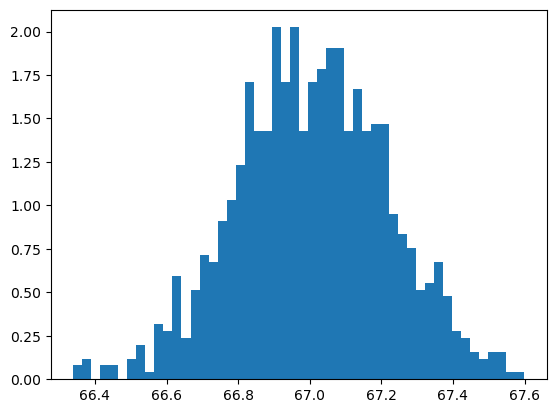

In [256]:
results_yes = []
for i in range(1000):
    results_yes.append(yes_partner.sample(frac = 10,\
                                    replace = True).MonthlyCharges.mean())
plt.hist(results_yes, density = True, bins = 50)
plt.show()

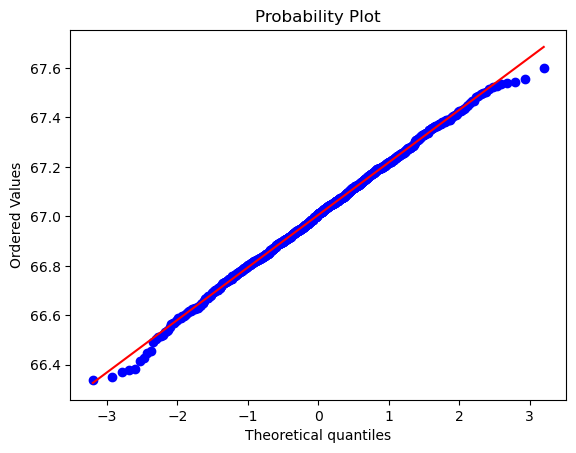

In [257]:
stats.probplot(results_yes, dist = 'norm', plot = pylab)
plt.show()

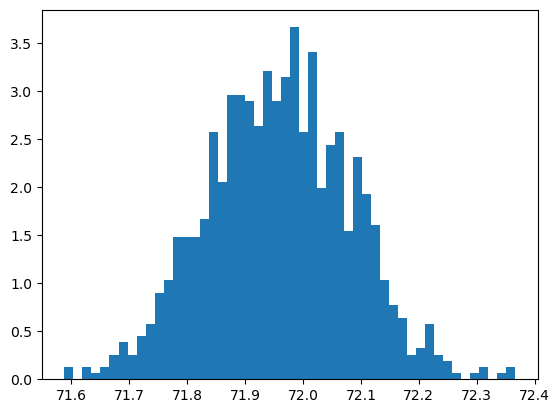

In [258]:
results_no = []
for i in range(1000):
    results_no.append(no_partner.sample(frac = 10,\
                                    replace = True).MonthlyCharges.mean())
plt.hist(results_no, density = True, bins = 50)
plt.show()

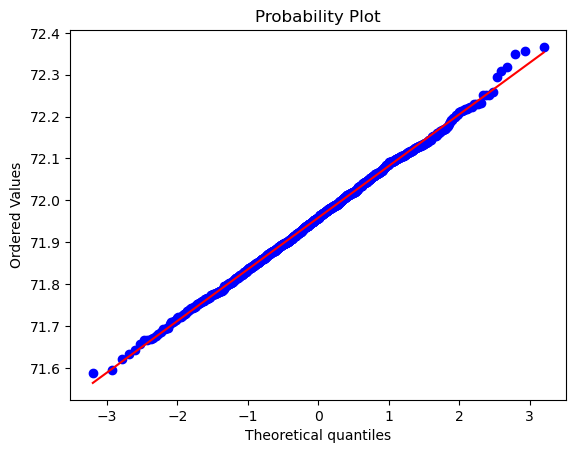

In [259]:
stats.probplot(results_no, dist = 'norm', plot = pylab)
plt.show()

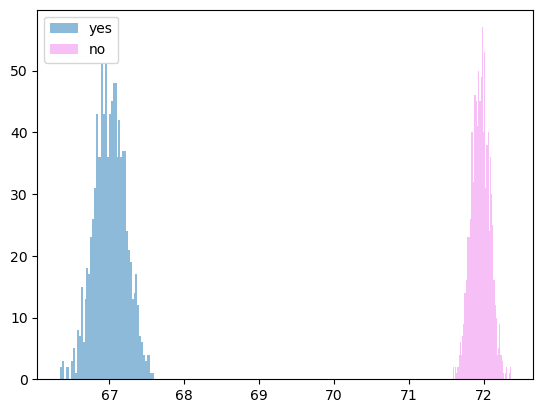

In [260]:
plt.hist(results_yes, label = "yes", bins = 50, alpha = 0.5)
plt.hist(results_no, label = "no", bins = 50, alpha = 0.5, color='violet')
plt.legend()
plt.show()

In [261]:
stats.fligner(yes_partner.MonthlyCharges, no_partner.MonthlyCharges)

FlignerResult(statistic=nan, pvalue=nan)

In [262]:
n1 = len(women)
n2 = len(men)

v1 = var1/n1
v2 = var2/n2
dofW = (v1 +v2)**2/ (v1**2/(n1-1) +v2**2/ (n2-1))
dofW

7036.722212327031

In [263]:
ttest = scipy.stats.ttest_ind(results_m, results_w, equal_var = False)
ttest

TtestResult(statistic=-16.09394200714272, pvalue=6.840146739228474e-55, df=1997.329004556469)

In [264]:
t_crit = stats.t.ppf(0.95, dofW)
t_crit

1.6450702009398708

In [265]:
def hypothesis_check (tstat, t_crit): 
    if abs(tstat) > t_crit:
        print ('Отвергаем Н0')
    else:
        print('He отвергаем НО')
        
hypothesis_check(tstat, t_crit)

Отвергаем Н0


# График по использованию сервисов (вся выборка)

In [266]:
df['h_InternetService'] = df['InternetService'].replace({'DSL': 'Yes', 'Fiber optic': 'Yes'})

In [267]:
services = [
    'PhoneService',
    'MultipleLines',
    'h_InternetService',
    'OnlineSecurity',
    'OnlineBackup',
    'DeviceProtection',
    'TechSupport',
    'StreamingTV',
    'StreamingMovies'
]
services_dict = {}

for service in services:
    print(service)
    print(round(df[df[service] == "Yes"].shape[0] / df.shape[0] * 100, 2))
    services_dict[service] = round(df[df[service] == "Yes"].shape[0] / df.shape[0] * 100, 2)
    
data = {'service': [key for key in services_dict.keys()], 'users_percent': list(services_dict.values())}
df_services = pd.DataFrame(data)
df_services = df_services.sort_values('service')

PhoneService
90.32
MultipleLines
42.18
h_InternetService
78.33
OnlineSecurity
28.67
OnlineBackup
34.49
DeviceProtection
34.39
TechSupport
29.02
StreamingTV
38.44
StreamingMovies
38.79


In [268]:
services = [
    'PhoneService',
    'MultipleLines',
    'h_InternetService',
    'OnlineSecurity',
    'OnlineBackup',
    'DeviceProtection',
    'TechSupport',
    'StreamingTV',
    'StreamingMovies'
]
services_dict = {}

for service in services:
    print(service)
    print(round(df[(df[service] == "Yes") & (df.Churn == 'No')].shape[0] / df.shape[0] * 100, 2))
    services_dict[service] = round(df[(df[service] == "Yes") & (df.Churn == 'No')].shape[0] / (df[df[service] == "Yes"].shape[0]+1) * 100, 2)
    
data = {'service': [key for key in services_dict.keys()], 'users_percent': list(services_dict.values())}
df_services_churn = pd.DataFrame(data)
df_services_churn = df_services_churn.sort_values('service')

PhoneService
66.19
MultipleLines
30.12
h_InternetService
53.4
OnlineSecurity
24.48
OnlineBackup
27.06
DeviceProtection
26.65
TechSupport
24.62
StreamingTV
26.88
StreamingMovies
27.18


In [269]:
import plotly.graph_objects as go

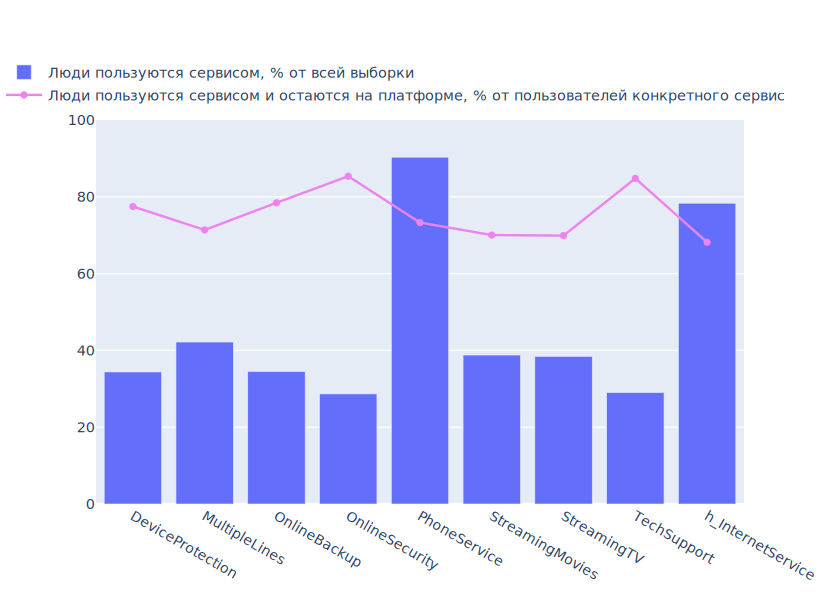

In [270]:
fig = go.Figure()

fig.add_trace(go.Bar(x=df_services['service'], 
                     y=df_services['users_percent'],
                     name='Люди пользуются сервисом, % от всей выборки'))

fig.add_trace(go.Scatter(x=df_services_churn['service'], 
                         y=df_services_churn['users_percent'],
                         marker=dict(
                         color='violet'), name='Люди пользуются сервисом и остаются на платформе, % от пользователей конкретного сервиса'))

fig.update_layout(yaxis_range=[0, 100])
fig.update_layout(legend=dict(
    yanchor="bottom",
    y=1.02,
    xanchor="right",
    x=1
))
fig.show()

# График по использованию сервиса InternetService

/var/folders/gy/s8yxg6290qgclp7wtmx9g6f00000gn/T/ipykernel_25775/2698633035.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/gy/s8yxg6290qgclp7wtmx9g6f00000gn/T/ipykernel_25775/2698633035.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



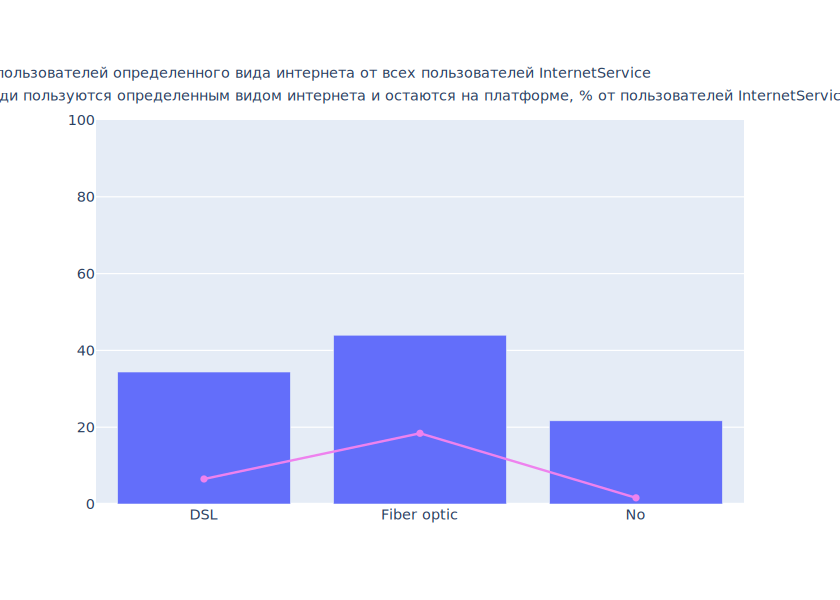

In [271]:
##################################################
df_internet = df[['InternetService', 'Churn']]
df_internet['Churn'] = df_internet['Churn'].replace({'Yes':1, 'No': 0})
df_internet['user'] = 1

df_internet_group = df_internet.groupby('InternetService').sum().reset_index()
df_internet_group['service'] = 'InternetService'
summ = df_internet_group['user'].sum()
df_internet_group['user_percent'] = df_internet_group['user'] / summ * 100
df_internet_group['churn_percent'] = df_internet_group['Churn'] / summ * 100

fig = go.Figure()

fig.add_trace(go.Bar(x=df_internet_group['InternetService'], 
                     y=df_internet_group['user_percent'],
                     name='% пользователей определенного вида интернета от всех пользователей InternetService'))

fig.add_trace(go.Scatter(x=df_internet_group['InternetService'], 
                         y=df_internet_group['churn_percent'],
                         marker=dict(
                         color='violet'), name='Люди пользуются определенным видом интернета и остаются на платформе, % от пользователей InternetService'))


fig.update_layout(yaxis_range=[0, 100])
fig.update_layout(legend=dict(
    yanchor="bottom",
    y=1.02,
    xanchor="right",
    x=1
))
fig.show()

# График по использованию сервисов (самые богатые 20% по LTV)

In [272]:
df = df.sort_values('ltv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,ltv,one,h_InternetService
1082,4367-NUYAO,Male,No,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,Two year,No,Mailed check,25.75,NaN,No,0.0,1,No
6670,4075-WKNIU,Female,No,Yes,Yes,0,Yes,Yes,DSL,No,...,No,Two year,No,Mailed check,73.35,NaN,No,0.0,1,Yes
753,3115-CZMZD,Male,No,No,Yes,0,Yes,No,No,No internet service,...,No internet service,Two year,No,Mailed check,20.25,NaN,No,0.0,1,No
1340,1371-DWPAZ,Female,No,Yes,Yes,0,No,No phone service,DSL,Yes,...,No,Two year,No,Credit card (automatic),56.05,NaN,No,0.0,1,Yes
3826,3213-VVOLG,Male,No,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,Two year,No,Mailed check,25.35,NaN,No,0.0,1,No


# График по использованию сервисов (tenure маленький, ниже заданного порога)

In [273]:
tenure_threshold = 3

In [274]:
services = [
    'PhoneService',
    'MultipleLines',
    'h_InternetService',
    'OnlineSecurity',
    'OnlineBackup',
    'DeviceProtection',
    'TechSupport',
    'StreamingTV',
    'StreamingMovies'
]
services_dict = {}

for service in services:
    print(service)
    print(round(df[(df[service] == "Yes")&(df.tenure < tenure_threshold)].shape[0] / df[df.tenure < tenure_threshold].shape[0] * 100, 2))
    services_dict[service] = round(df[(df[service] == "Yes")&(df.tenure < tenure_threshold)].shape[0] / df[df.tenure < tenure_threshold].shape[0] * 100, 2)
    
data = {'service': [key for key in services_dict.keys()], 'users_percent': list(services_dict.values())}
df_services = pd.DataFrame(data)
df_services = df_services.sort_values('service')

PhoneService
90.72
MultipleLines
14.97
h_InternetService
74.59
OnlineSecurity
7.89
OnlineBackup
10.32
DeviceProtection
8.7
TechSupport
6.5
StreamingTV
14.97
StreamingMovies
15.43


In [275]:
services = [
    'PhoneService',
    'MultipleLines',
    'h_InternetService',
    'OnlineSecurity',
    'OnlineBackup',
    'DeviceProtection',
    'TechSupport',
    'StreamingTV',
    'StreamingMovies'
]
services_dict = {}

for service in services:
    print(service)
    print(round(df[(df[service] == "Yes") & (df.Churn == 'No')&(df.tenure < tenure_threshold)].shape[0] / df[df.tenure < tenure_threshold].shape[0] * 100, 2))
    services_dict[service] = round(df[(df[service] == "Yes") & (df.Churn == 'No')&(df.tenure < tenure_threshold)].shape[0] / (df[(df[service] == "Yes")&(df.tenure < tenure_threshold)].shape[0]+1) * 100, 2)
    
data = {'service': [key for key in services_dict.keys()], 'users_percent': list(services_dict.values())}
df_services_churn = pd.DataFrame(data)
df_services_churn = df_services_churn.sort_values('service')

PhoneService
38.52
MultipleLines
4.06
h_InternetService
23.67
OnlineSecurity
4.41
OnlineBackup
4.64
DeviceProtection
2.32
TechSupport
3.6
StreamingTV
3.36
StreamingMovies
3.36


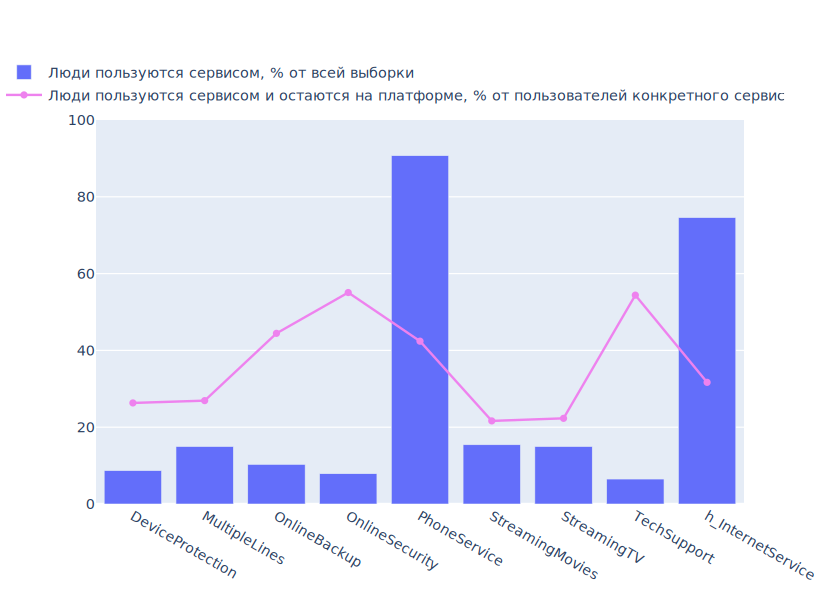

In [276]:
fig = go.Figure()

fig.add_trace(go.Bar(x=df_services['service'], 
                     y=df_services['users_percent'],
                     name='Люди пользуются сервисом, % от всей выборки'))

fig.add_trace(go.Scatter(x=df_services_churn['service'], 
                         y=df_services_churn['users_percent'],
                         marker=dict(
                         color='violet'), name='Люди пользуются сервисом и остаются на платформе, % от пользователей конкретного сервиса'))


fig.update_layout(yaxis_range=[0, 100])
fig.update_layout(legend=dict(
    yanchor="bottom",
    y=1.02,
    xanchor="right",
    x=1
))
fig.show()

# График по использованию сервисов (самые богатые по LTV 20%)

In [277]:
df = df.dropna(subset=['ltv'])
df_rich = df[int(df.shape[0]/5*4):]
df_rich['h_InternetService'] = df_rich['InternetService'].replace({'DSL': 'Yes', 'Fiber optic': 'Yes'})
df_rich

/var/folders/gy/s8yxg6290qgclp7wtmx9g6f00000gn/T/ipykernel_25775/2989852622.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,ltv,one,h_InternetService
4264,8818-DOPVL,Female,Yes,No,No,46,Yes,Yes,Fiber optic,No,...,Yes,Month-to-month,Yes,Electronic check,104.45,4863.85,No,4804.7,1,Yes
5281,7399-QHBJS,Female,No,Yes,Yes,72,Yes,Yes,DSL,Yes,...,No,Two year,No,Credit card (automatic),66.75,4760.30,No,4806.0,1,Yes
5940,9711-FJTBX,Male,No,Yes,Yes,56,Yes,No,Fiber optic,No,...,No,One year,Yes,Mailed check,85.85,4793.80,No,4807.6,1,Yes
1656,8189-HBVRW,Female,No,No,No,53,Yes,Yes,Fiber optic,Yes,...,No,Month-to-month,No,Electronic check,90.80,4921.20,No,4812.4,1,Yes
763,1266-NZYUI,Female,No,Yes,Yes,72,Yes,Yes,DSL,Yes,...,No,Two year,No,Bank transfer (automatic),66.85,4758.80,No,4813.2,1,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6768,9739-JLPQJ,Female,No,Yes,Yes,72,Yes,Yes,Fiber optic,Yes,...,Yes,Two year,No,Credit card (automatic),117.50,8670.10,No,8460.0,1,Yes
3205,3810-DVDQQ,Female,No,Yes,Yes,72,Yes,Yes,Fiber optic,Yes,...,Yes,Two year,Yes,Bank transfer (automatic),117.60,8308.90,No,8467.2,1,Yes
4610,2889-FPWRM,Male,No,Yes,No,72,Yes,Yes,Fiber optic,Yes,...,Yes,One year,Yes,Bank transfer (automatic),117.80,8684.80,Yes,8481.6,1,Yes
6118,9924-JPRMC,Male,No,No,No,72,Yes,Yes,Fiber optic,Yes,...,Yes,Two year,Yes,Electronic check,118.20,8547.15,No,8510.4,1,Yes


In [278]:
services = [
    'PhoneService',
    'MultipleLines',
    'h_InternetService',
    'OnlineSecurity',
    'OnlineBackup',
    'DeviceProtection',
    'TechSupport',
    'StreamingTV',
    'StreamingMovies'
]
services_dict = {}

for service in services:
    print(service)
    print(round(df_rich[df_rich[service] == "Yes"].shape[0] / df_rich.shape[0] * 100, 2))
    services_dict[service] = round(df_rich[df_rich[service] == "Yes"].shape[0] / df_rich.shape[0] * 100, 2)
    
data = {'service': [key for key in services_dict.keys()], 'users_percent': list(services_dict.values())}
df_services = pd.DataFrame(data)
df_services = df_services.sort_values('service')

PhoneService
99.92
MultipleLines
82.93
h_InternetService
100.0
OnlineSecurity
57.97
OnlineBackup
75.6
DeviceProtection
74.88
TechSupport
59.98
StreamingTV
80.84
StreamingMovies
81.88


In [279]:
services = [
    'PhoneService',
    'MultipleLines',
    'h_InternetService',
    'OnlineSecurity',
    'OnlineBackup',
    'DeviceProtection',
    'TechSupport',
    'StreamingTV',
    'StreamingMovies'
]
services_dict = {}

for service in services:
    print(service)
    print(round(df_rich[(df_rich[service] == "Yes") & (df_rich.Churn == 'No')].shape[0] / df_rich.shape[0] * 100, 2))
    services_dict[service] = round(df_rich[(df_rich[service] == "Yes") & (df_rich.Churn == 'No')].shape[0] / (df_rich[df_rich[service] == "Yes"].shape[0]+1) * 100, 2)
    
data = {'service': [key for key in services_dict.keys()], 'users_percent': list(services_dict.values())}
df_services_churn = pd.DataFrame(data)
df_services_churn = df_services_churn.sort_values('service')

PhoneService
86.39
MultipleLines
70.85
h_InternetService
86.47
OnlineSecurity
53.14
OnlineBackup
66.1
DeviceProtection
65.62
TechSupport
54.75
StreamingTV
68.68
StreamingMovies
69.65


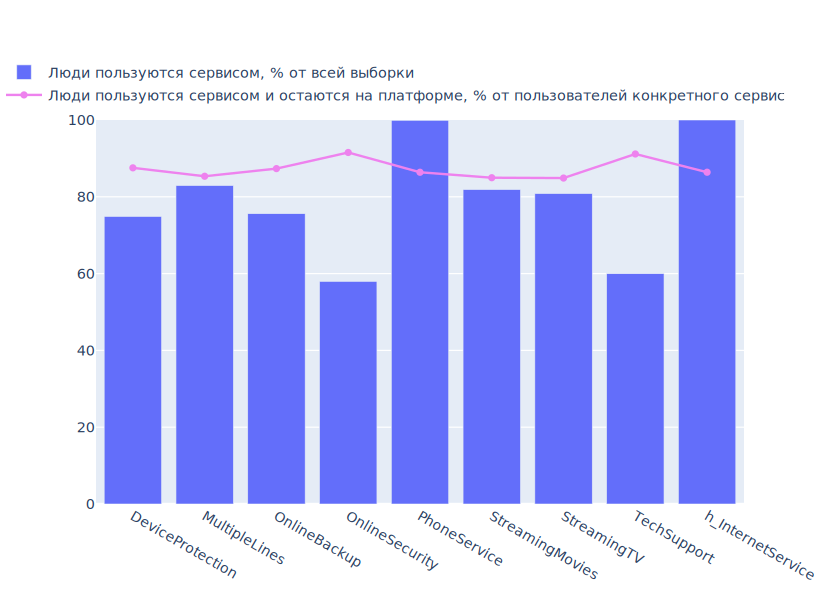

In [280]:
fig = go.Figure()

fig.add_trace(go.Bar(x=df_services['service'], 
                     y=df_services['users_percent'],
                     name='Люди пользуются сервисом, % от всей выборки'))


fig.add_trace(go.Scatter(x=df_services_churn['service'], 
                         y=df_services_churn['users_percent'],
                         marker=dict(
                         color='violet'), name='Люди пользуются сервисом и остаются на платформе, % от пользователей конкретного сервиса'))

fig.update_layout(yaxis_range=[0, 100])
fig.update_layout(legend=dict(
    yanchor="bottom",
    y=1.02,
    xanchor="right",
    x=1
))
fig.show()

# График по использованию сервисов (самые богатые 20% среди тех, у кого tenure от 3 до 10 месяцев)

In [281]:
df_rich_young = df[(df.tenure < 11)&(df.tenure > 2)]
df_rich_young = df_rich_young[int(df_rich_young.shape[0]/5*4):]

In [282]:
services = [
    'PhoneService',
    'MultipleLines',
    'h_InternetService',
    'OnlineSecurity',
    'OnlineBackup',
    'DeviceProtection',
    'TechSupport',
    'StreamingTV',
    'StreamingMovies'
]
services_dict = {}

for service in services:
    print(service)
    print(round(df_rich_young[df_rich_young[service] == "Yes"].shape[0] / df_rich_young.shape[0] * 100, 2))
    services_dict[service] = round(df_rich_young[df_rich_young[service] == "Yes"].shape[0] / df_rich_young.shape[0] * 100, 2)
    
data = {'service': [key for key in services_dict.keys()], 'users_percent': list(services_dict.values())}
df_services = pd.DataFrame(data)
df_services = df_services.sort_values('service')

PhoneService
100.0
MultipleLines
52.55
h_InternetService
100.0
OnlineSecurity
15.82
OnlineBackup
22.45
DeviceProtection
32.14
TechSupport
16.33
StreamingTV
54.08
StreamingMovies
58.16


In [283]:
services = [
    'PhoneService',
    'MultipleLines',
    'h_InternetService',
    'OnlineSecurity',
    'OnlineBackup',
    'DeviceProtection',
    'TechSupport',
    'StreamingTV',
    'StreamingMovies'
]
services_dict = {}

for service in services:
    print(service)
    print(round(df_rich_young[(df_rich_young[service] == "Yes") & (df_rich_young.Churn == 'No')].shape[0] / df_rich_young.shape[0] * 100, 2))
    services_dict[service] = round(df_rich_young[(df_rich_young[service] == "Yes") & (df_rich_young.Churn == 'No')].shape[0] / (df_rich_young[df_rich_young[service] == "Yes"].shape[0]+1) * 100, 2)
    
data = {'service': [key for key in services_dict.keys()], 'users_percent': list(services_dict.values())}
df_services_churn = pd.DataFrame(data)
df_services_churn = df_services_churn.sort_values('service')

PhoneService
40.31
MultipleLines
15.82
h_InternetService
40.31
OnlineSecurity
8.67
OnlineBackup
8.67
DeviceProtection
12.24
TechSupport
10.71
StreamingTV
17.35
StreamingMovies
19.9


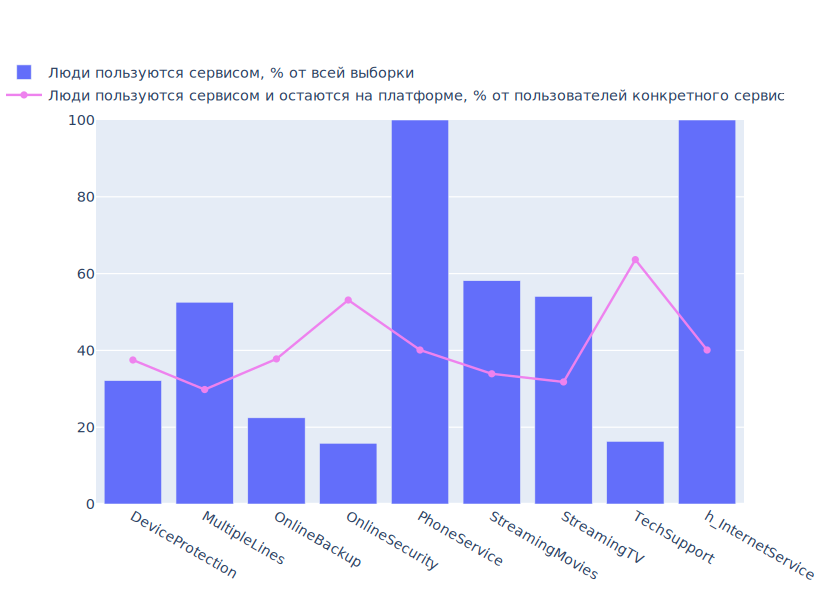

In [284]:
fig = go.Figure()

fig.add_trace(go.Bar(x=df_services['service'], 
                     y=df_services['users_percent'],
                     name='Люди пользуются сервисом, % от всей выборки'))


fig.add_trace(go.Scatter(x=df_services_churn['service'], 
                         y=df_services_churn['users_percent'],
                         marker=dict(
                         color='violet'), name='Люди пользуются сервисом и остаются на платформе, % от пользователей конкретного сервиса'))

fig.update_layout(yaxis_range=[0, 100])
fig.update_layout(legend=dict(
    yanchor="bottom",
    y=1.02,
    xanchor="right",
    x=1
))
fig.show()

# Churn rate в зависимости от tenure

In [285]:
tenure_dict = {}

for i in df.tenure.unique():
    tenure_dict[i] = df[(df.tenure == i) & (df.Churn == 'Yes')].shape[0] / df[df.tenure == i].shape[0] * 100
    
data = {'tenure': [key for key in tenure_dict.keys()], 'churn_rate': list(tenure_dict.values())}
df_tenure_churn = pd.DataFrame(data)
df_tenure_churn = df_tenure_churn.sort_values('tenure')

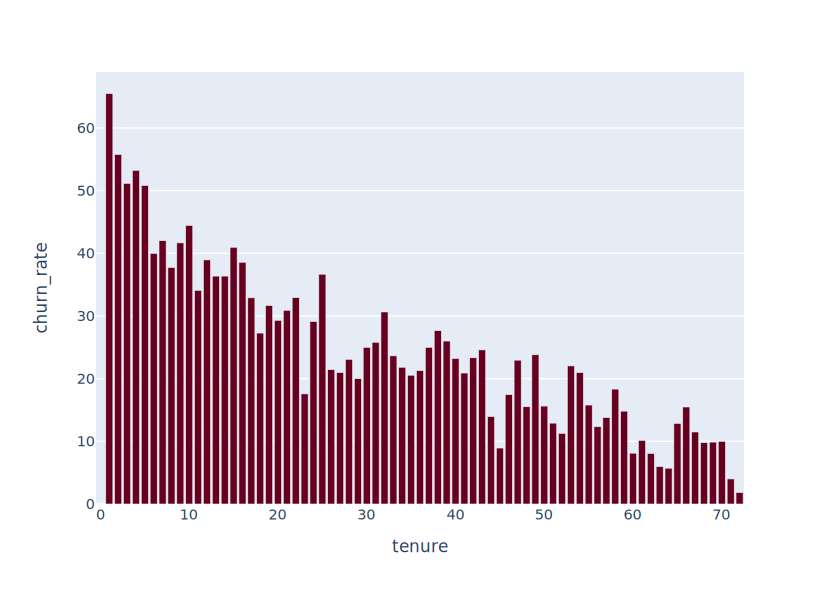

In [286]:
fig = px.bar(df_tenure_churn, x='tenure', y='churn_rate', color_discrete_sequence=px.colors.sequential.RdBu)
fig.show()